# Import Libraries

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Datasets

In [214]:
#Train Dataset
train = pd.read_csv('../Resources/train.csv')
#Test Dataset
test = pd.read_csv('../Resources/test.csv')

In [215]:
train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [216]:
#Dataset Characteristics
print('The train dataset has '+ str(train.shape[0])+' rows and '+ str(train.shape[1])+' columns')
print('The test dataset has '+ str(test.shape[0])+' rows and '+ str(test.shape[1])+' columns')

The train dataset has 26298 rows and 6 columns
The test dataset has 6570 rows and 5 columns


In [217]:
column_names = train.columns
countries = train.country.value_counts().index
stores = train.store.value_counts().index
products = train.iloc[:,4].value_counts().index

In [218]:
print('The dataset has '+ str(len(countries))+' countries and the names are:')
for i in countries:
    print('-'+i)
print('')
print('The dataset has '+ str(len(stores))+' stores and the names are:')
for i in stores:
    print('-'+i)
print('')
print('The dataset has '+ str(len(products))+' products and the names are:')
for i in products:
    print('-'+i)

The dataset has 3 countries and the names are:
-Finland
-Norway
-Sweden

The dataset has 2 stores and the names are:
-KaggleMart
-KaggleRama

The dataset has 3 products and the names are:
-Kaggle Sticker
-Kaggle Mug
-Kaggle Hat


In [219]:
#Get the range of dates
#Training data range
print('Training Data - Max Date',train.date.max())
print('Training Data - Min Date',train.date.min())
#Test data range
print('Test Data - Max Date',test.date.max())
print('Test Data - Min Date',test.date.min())

Training Data - Max Date 2018-12-31
Training Data - Min Date 2015-01-01
Test Data - Max Date 2019-12-31
Test Data - Min Date 2019-01-01


NOTE: Goal is to forecast the upcoming year of sales (2019)

In [220]:
#Review Data Types
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6570 entries, 0 to 6569
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   row_id   6570 non-null   int64 
 1   date     6570 non-null   object
 2   country  6570 non-null   object
 3   store    6570 non-null   object
 4   product  6570 non-null   object
dtypes: int64(1), object(4)
memory usage: 256.8+ KB


(None, None)

In [221]:
#Date column needs to be converted into datetime format
train.date = pd.to_datetime(train.date, format='%Y-%m-%d')
test.date = pd.to_datetime(test.date, format='%Y-%m-%d')

In [222]:
train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


# Exploratory Data Analysis

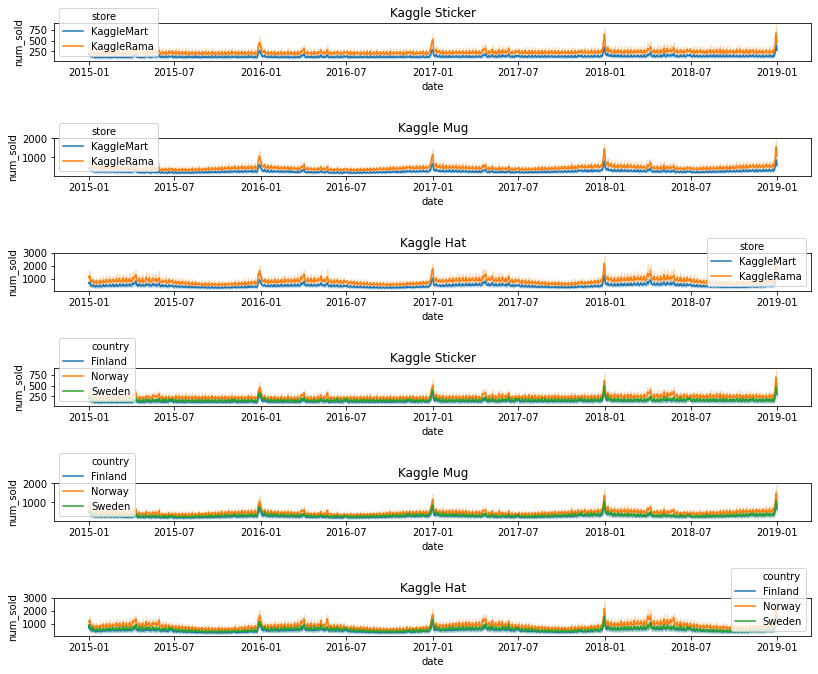

In [111]:
#Visualizing Sales By Product & by Store
KS = train[train['product']=='Kaggle Sticker']
KM = train[train['product']=='Kaggle Mug']
KH = train[train['product']=='Kaggle Hat']

# Subplots
fig, axes = plt.subplots(6, 1, figsize=(12, 10))

# Lineplots
sns.lineplot(ax=axes[0], data=KS, x='date', y='num_sold', hue='store').set(title='Kaggle Sticker')
sns.lineplot(ax=axes[1], data=KM, x='date', y='num_sold', hue ='store').set(title='Kaggle Mug')
sns.lineplot(ax=axes[2], data=KH, x='date', y='num_sold', hue='store').set(title='Kaggle Hat')
# Lineplots
sns.lineplot(ax=axes[3], data=KS, x='date', y='num_sold', hue='country').set(title='Kaggle Sticker')
sns.lineplot(ax=axes[4], data=KM, x='date', y='num_sold', hue ='country').set(title='Kaggle Mug')
sns.lineplot(ax=axes[5], data=KH, x='date', y='num_sold', hue='country').set(title='Kaggle Hat')

# Adding some Padding to the Plots
fig.tight_layout(pad=3.0)

Note: KaggleRama has consistently led the market. Both stores exhibit spikes during the holiday season. For all products Norway has the highest volume.

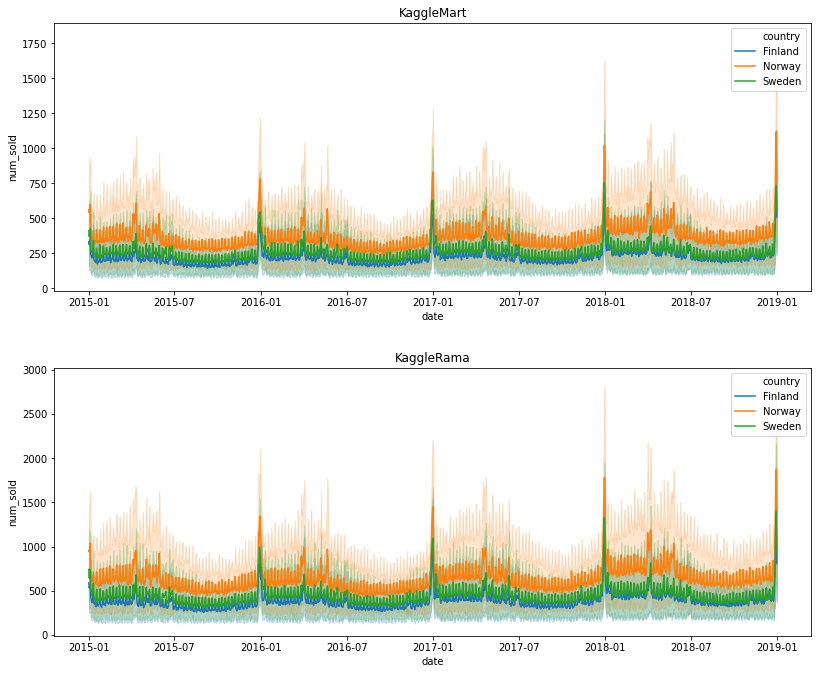

In [112]:
#Visualizing Sales By Country & by Store
KM = train[train['store']=='KaggleMart']
KR = train[train['store']=='KaggleRama']

# Subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Lineplots
sns.lineplot(ax=axes[0], data=KM, x='date', y='num_sold', hue='country').set(title='KaggleMart')
sns.lineplot(ax=axes[1], data=KR, x='date', y='num_sold', hue='country').set(title='KaggleRama')

# Adding some Padding to the Plots
fig.tight_layout(pad=3.0)

Note: Product sales for both stores are higher in Norway

# Augmenting The Dataset

In [223]:
#Split Date into Year, Month and Day
#Training Set
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

#Test Set
test['day'] = test['date'].dt.day
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year

In [224]:
#Adding column to indicate holidays
#Holidays Dataset taken from: https://www.kaggle.com/drcapa/holidays-finland-norway-sweden-20152019
#Loading Holiday Dataset
holidays = pd.read_csv('../Resources/Holidays_Finland_Norway_Sweden_2015-2019.csv')
holidays.Date = pd.to_datetime(holidays.Date, format='%Y-%m-%d')
holidays.head()

,Date,Country,LocalName,Name,Fixed
0,2015-01-01,Finland,Uudenvuodenpäivä,New Year's Day,True
1,2015-01-06,Finland,Loppiainen,Epiphany,True
2,2015-04-03,Finland,Pitkäperjantai,Good Friday,False
3,2015-04-05,Finland,Pääsiäispäivä,Easter Sunday,False
4,2015-04-06,Finland,2. pääsiäispäivä,Easter Monday,False


In [225]:
# Function to ad a column to the datasets indicating if a date is a holiday
def add_holiday(df,holidays):
    #Get Holidays for Each Country
    FFH = holidays[holidays['Country']=='Finland']
    SWH = holidays[holidays['Country']=='Sweden']
    NWH = holidays[holidays['Country']=='Norway']
    #Innitialize Column to encode Holiday
    df["isholiday"] = 0
        
    for i in range(0,len(df)):
        
        if df.country.iloc[i] == 'Finland':          
        
            for j in range(0,len(FFH)):
                if df.date.iloc[i] == FFH.Date.iloc[j]:
                    df['isholiday'].iloc[i]=1

                    
        elif df.country.iloc[i] == 'Sweden':          
        
            for k in range(0,len(SWH)):
                if df.date.iloc[i] == SWH.Date.iloc[k]:
                    df['isholiday'].iloc[i]=1

                    
        else:          
        
            for l in range(0,len(NWH)):
                if df.date.iloc[i] == NWH.Date.iloc[l]:
                    df['isholiday'].iloc[i]=1

           

    return df
        

In [226]:
add_holiday(train,holidays)
add_holiday(test,holidays)

/Users/carlospazos/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,row_id,date,country,store,product,day,month,year,isholiday
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug,1,1,2019,1
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat,1,1,2019,1
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker,1,1,2019,1
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug,1,1,2019,1
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat,1,1,2019,1
...,...,...,...,...,...,...,...,...,...
6565,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat,31,12,2019,1
6566,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker,31,12,2019,1
6567,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug,31,12,2019,1
6568,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat,31,12,2019,1


In [227]:
test.head()

,row_id,date,country,store,product,day,month,year,isholiday
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug,1,1,2019,1
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat,1,1,2019,1
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker,1,1,2019,1
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug,1,1,2019,1
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat,1,1,2019,1


In [228]:
# Adding the GDP per year per country
# Loading GDP Dataset
gdp = pd.read_csv('../Resources/GDP_data_2015_to_2019_Finland_Norway_Sweden.csv',index_col="year")
gdp.head()

,GDP_Finland,GDP_Norway,GDP_Sweden
year,,,
2015,234.440,385.802,505.104
2016,240.608,368.827,515.655
2017,255.017,398.394,541.019
2018,275.580,437.000,555.455
2019,268.782,405.510,533.880


In [229]:
# Renaming the column names
gdp.columns = ['Finland','Norway','Sweden']
gdp.head()

,Finland,Norway,Sweden
year,,,
2015,234.440,385.802,505.104
2016,240.608,368.827,515.655
2017,255.017,398.394,541.019
2018,275.580,437.000,555.455
2019,268.782,405.510,533.880


In [230]:
gdp_dictionary = gdp.unstack().to_dict()

In [231]:
gdp_dictionary

{('Finland', 2015): 234.44,
 ('Finland', 2016): 240.608,
 ('Finland', 2017): 255.017,
 ('Finland', 2018): 275.58,
 ('Finland', 2019): 268.782,
 ('Norway', 2015): 385.80199999999996,
 ('Norway', 2016): 368.827,
 ('Norway', 2017): 398.394,
 ('Norway', 2018): 437.0,
 ('Norway', 2019): 405.51,
 ('Sweden', 2015): 505.10400000000004,
 ('Sweden', 2016): 515.655,
 ('Sweden', 2017): 541.019,
 ('Sweden', 2018): 555.455,
 ('Sweden', 2019): 533.88}

In [232]:
train['GDP']=train.set_index(['country','year']).index.map(gdp_dictionary.get)
test['GDP']=test.set_index(['country','year']).index.map(gdp_dictionary.get)

In [233]:
train.head()

,row_id,date,country,store,product,num_sold,day,month,year,isholiday,GDP
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,1,1,2015,1,234.44
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,1,1,2015,1,234.44
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,1,1,2015,1,234.44
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,1,1,2015,1,234.44
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,1,1,2015,1,234.44


In [234]:
test.head()

,row_id,date,country,store,product,day,month,year,isholiday,GDP
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug,1,1,2019,1,268.782
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat,1,1,2019,1,268.782
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker,1,1,2019,1,268.782
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug,1,1,2019,1,268.782
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat,1,1,2019,1,268.782
